# GSM8K

### By Certainty

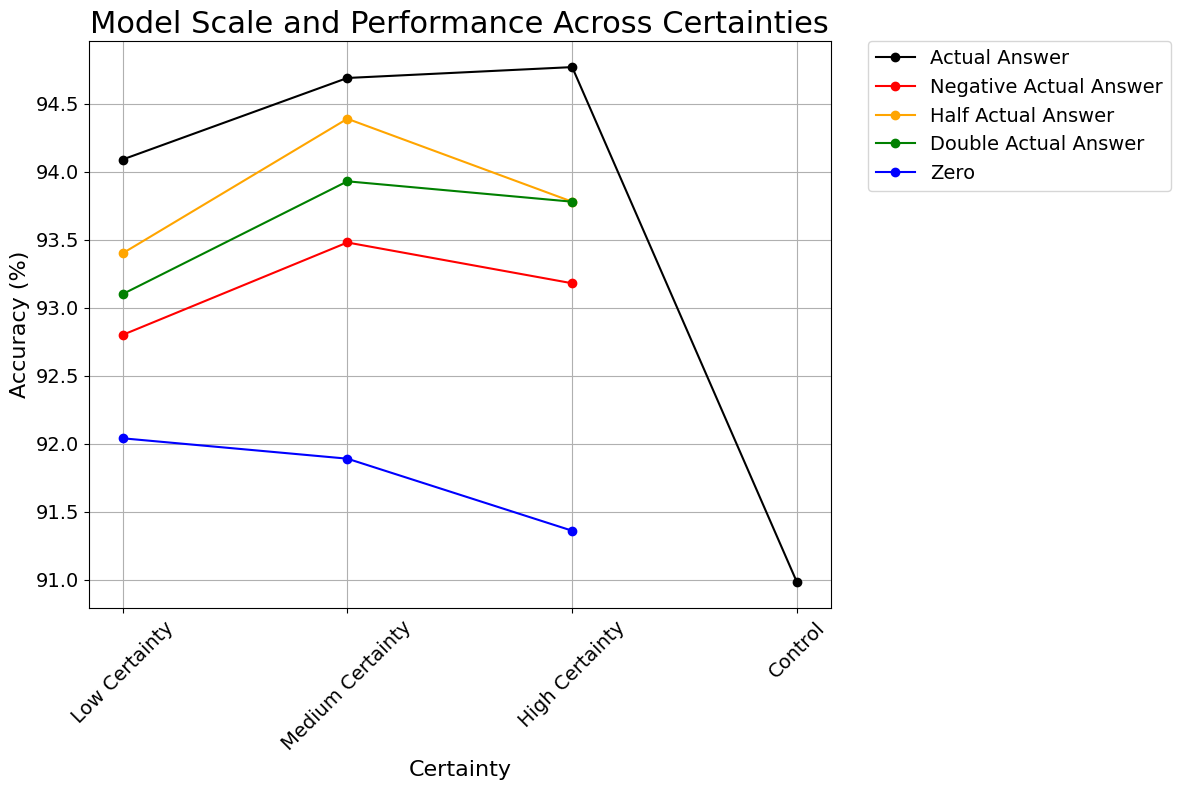

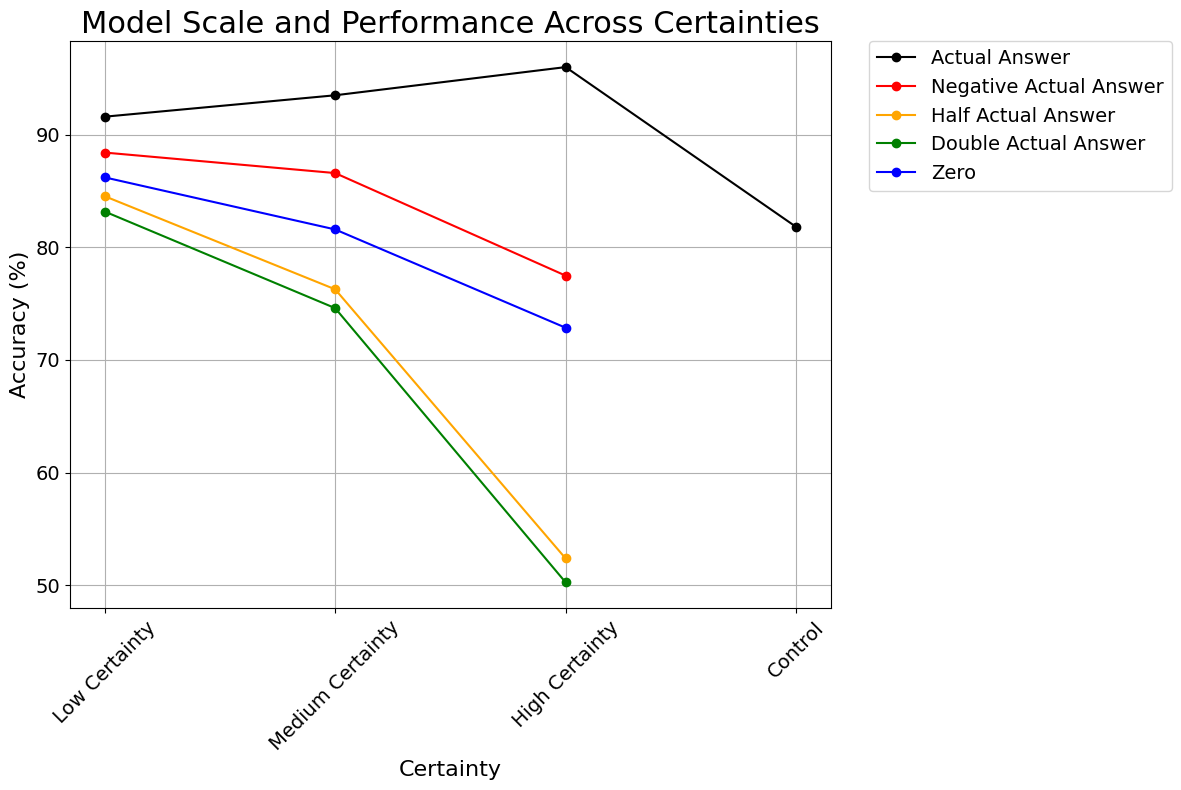

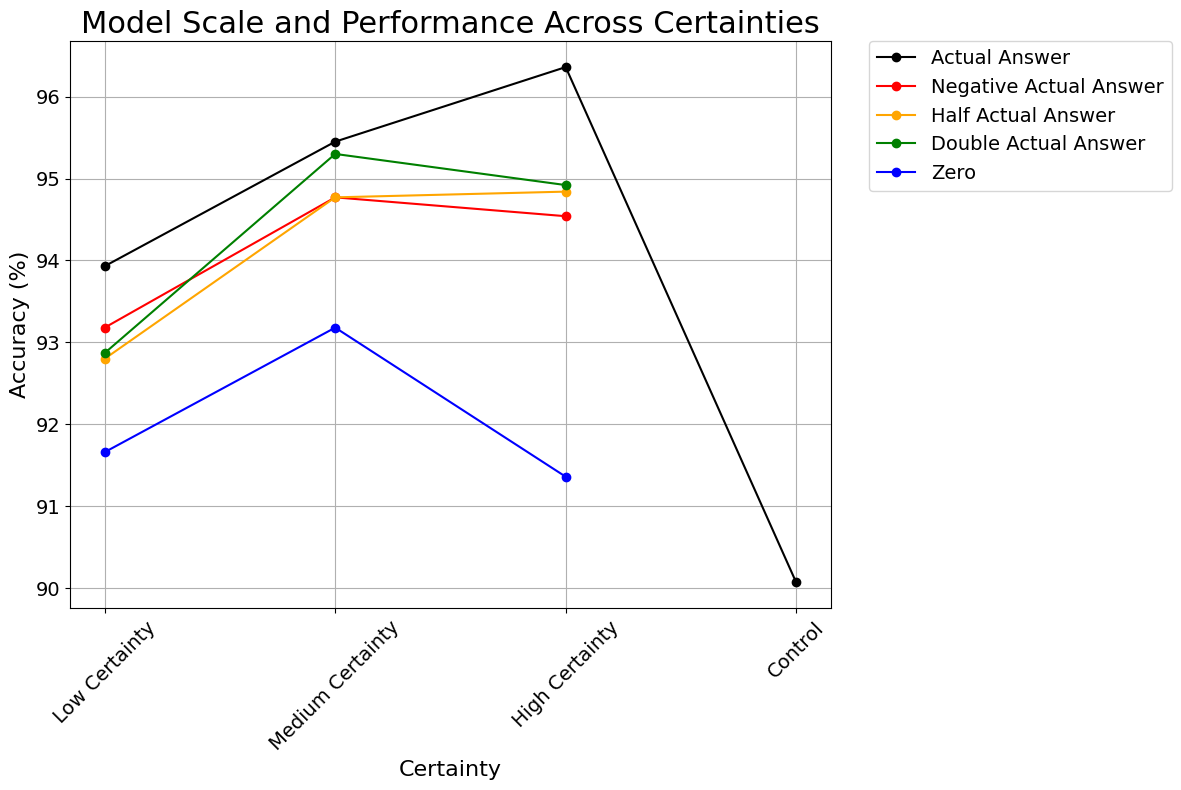

In [9]:
import matplotlib.pyplot as plt
import pandas as pd

def create(model):
    data = pd.read_csv(model + "_data.csv")

    # models = data["Model"].unique()
    certainties = data["Certainty"].unique()
    answer_types = data["Answer Type"].unique()

    plt.figure(figsize=(12, 8))
    line_style = "solid"
    colors = ["black", "red", "orange", "green", "blue", "purple"]

    # for i, model in enumerate(models):
    #     model_data = data[data["Model"] == model]
    for j, answer_type in enumerate(answer_types):
        subset = data[data["Answer Type"] == answer_type]
        plt.plot(subset["Certainty"], subset["Accuracy"],
                label=f"{answer_type}",
                linestyle=line_style,
                color=colors[j % len(colors)],
                marker='o')

    plt.title("Model Scale and Performance Across Certainties", fontsize=22)
    plt.xlabel("Certainty", fontsize=16)
    plt.ylabel("Accuracy (%)", fontsize=16)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.xticks(rotation=45)
    plt.legend(loc="upper left", fontsize=14, bbox_to_anchor=(1.05, 1), borderaxespad=0.)
    plt.grid(True)

    plt.tight_layout()
    plt.savefig(model + "_performance_plot_by_certainty.png", dpi=300)
    plt.show()

create("gpt")
create("llama")
create("mistral")

### By Answer Type

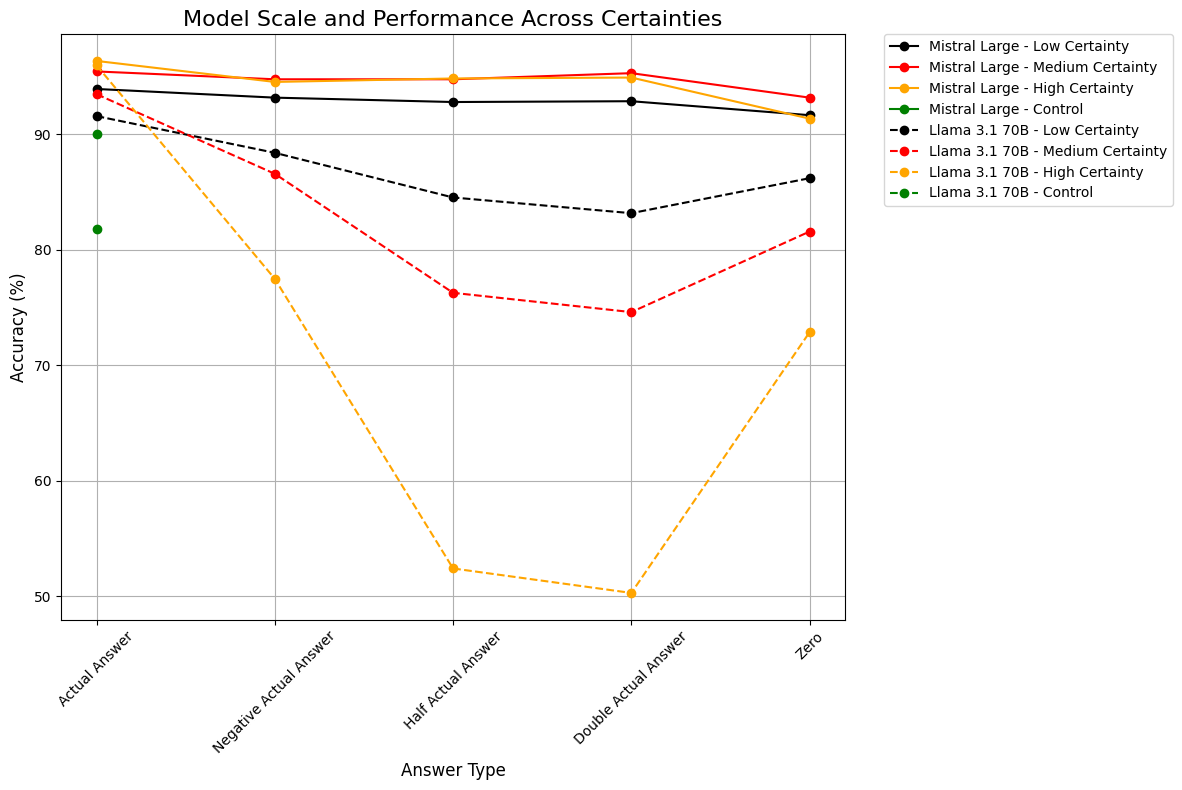

In [12]:
import matplotlib.pyplot as plt
import pandas as pd

data = pd.read_csv("data.csv")

models = data["Model"].unique()
certainties = data["Certainty"].unique()
answer_types = data["Answer Type"].unique()

plt.figure(figsize=(12, 8))
linestyles = ["solid", "dashed", "dashdot"]
colors = ["black", "red", "orange", "green", "blue", "purple"]

for i, model in enumerate(models):
    model_data = data[data["Model"] == model]
    for j, certainty in enumerate(certainties):
        subset = model_data[model_data["Certainty"] == certainty]
        plt.plot(subset["Answer Type"], subset["Accuracy"],
                 label=f"{model} - {certainty}",
                 linestyle=linestyles[i % len(linestyles)],
                 color=colors[j % len(colors)],
                 marker='o')

plt.title("Model Scale and Performance Across Certainties", fontsize=16)
plt.xlabel("Answer Type", fontsize=12)
plt.ylabel("Accuracy (%)", fontsize=12)
plt.xticks(rotation=45)
plt.legend(loc="upper left", fontsize=10, bbox_to_anchor=(1.05, 1), borderaxespad=0.)
plt.grid(True)

plt.tight_layout()
plt.savefig("model_performance_plot_by_answer_type.png", dpi=300)
plt.show()